# Trace metadata width visualization

In [70]:
import numpy as np
import sqlite3 as lite
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import os

from utils.db_utils import get_db_absolute_path

In [71]:
database = get_db_absolute_path("trace_metadata_width.db")
con2 = lite.connect(database)
query = "select * from trace_metadata_width;"
full_data = pd.read_sql_query(query, con2)

In [74]:
full_data.fillna("None",inplace=True)
full_data

,id,test_dataset_id,training_dataset_id,environment_id,distance,device,additive_noise_method_id,trace_process_id,trace_index,max_val,min_val,mean_val,rms_val,std_val
0,1,None,1.0,1,15.0,1,None,1,0,0.074767,0.025278,0.040720,0.042404,0.011831
1,2,None,1.0,1,15.0,1,None,1,1,0.074491,0.025428,0.040724,0.042397,0.011794
2,3,None,1.0,1,15.0,1,None,1,2,0.074857,0.025198,0.040693,0.042382,0.011845
3,4,None,1.0,1,15.0,1,None,1,3,0.074725,0.025346,0.040684,0.042367,0.011823
4,5,None,1.0,1,15.0,1,None,1,4,0.075115,0.025289,0.040627,0.042320,0.011849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237126,1237127,2.0,None,1,10.0,10,None,3,4994,1.000000,0.000000,0.453672,0.512417,0.238228
1237127,1237128,2.0,None,1,10.0,10,None,3,4995,0.932627,0.017924,0.480705,0.520036,0.198394
1237128,1237129,2.0,None,1,10.0,10,None,3,4996,0.923622,0.077919,0.517430,0.550360,0.187516
1237129,1237130,2.0,None,1,10.0,10,None,3,4997,1.000000,0.146505,0.530383,0.558437,0.174773


In [92]:
def plot_trace_width__test_traces_wang(test_set, training_set, distance, device, trace_process_id):
    data = full_data.copy()
    #data.fillna("None",inplace=True)
    data = data[data["test_dataset_id"] == test_set]
    data = data[data["training_dataset_id"] == training_set]
    data = data[data["device"] == device]
    data = data[data["distance"] == distance]
    data = data[data["trace_process_id"] == trace_process_id]
    data["dyn_range"] = data["max_val"] - data["min_val"]
    mean_dynrange = np.mean(data["dyn_range"])
    plt.figure(figsize=(40,5))
    ax = plt.subplot(1,1,1)
    data.plot(x="trace_index", y="dyn_range", ax=ax)
    plt.ylim(mean_dynrange*0.9, mean_dynrange*1.2)
    plt.axhline(mean_dynrange, color="r")
    plt.title(f"Test_set: {test_set}, Training_set: {training_set}, Device: {device}, Distance: {distance}, Process_id: {trace_process_id}\nMean dyn-range: {round(mean_dynrange, 4)}")
    plt.show()

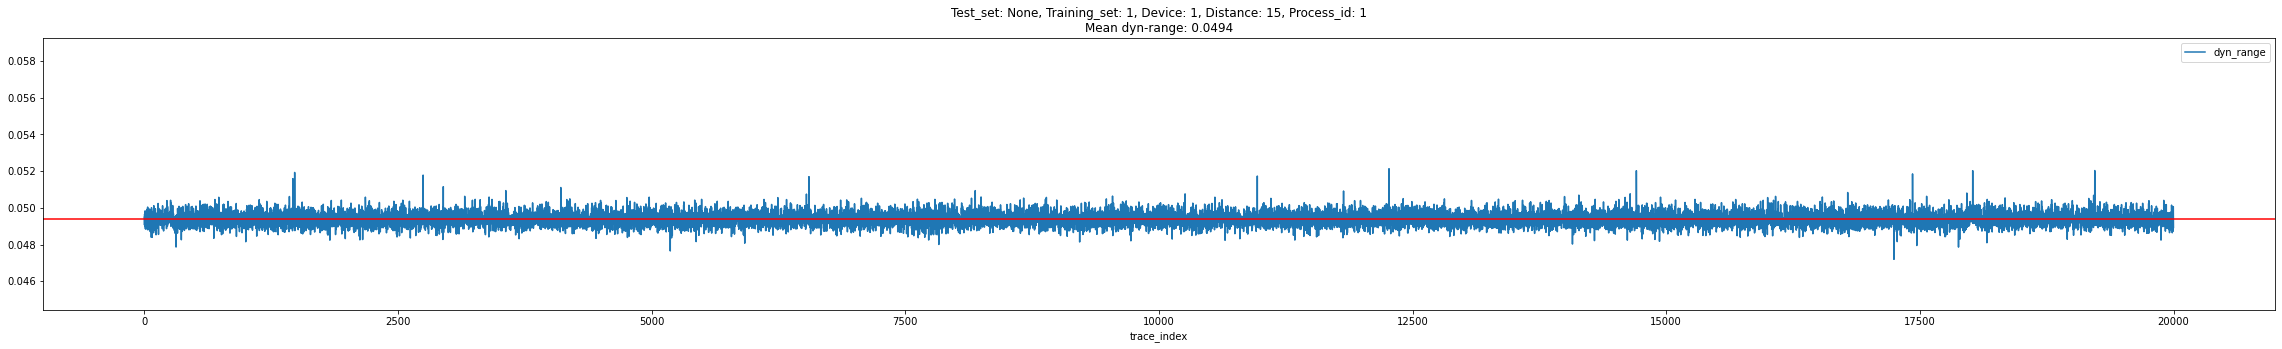

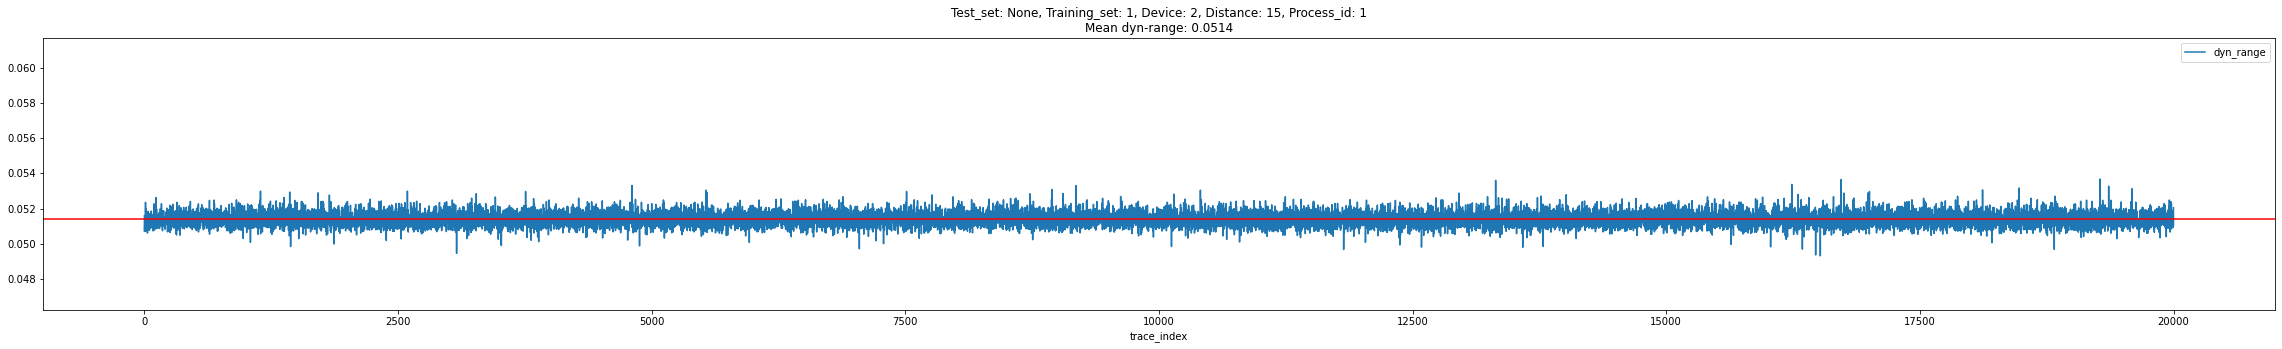

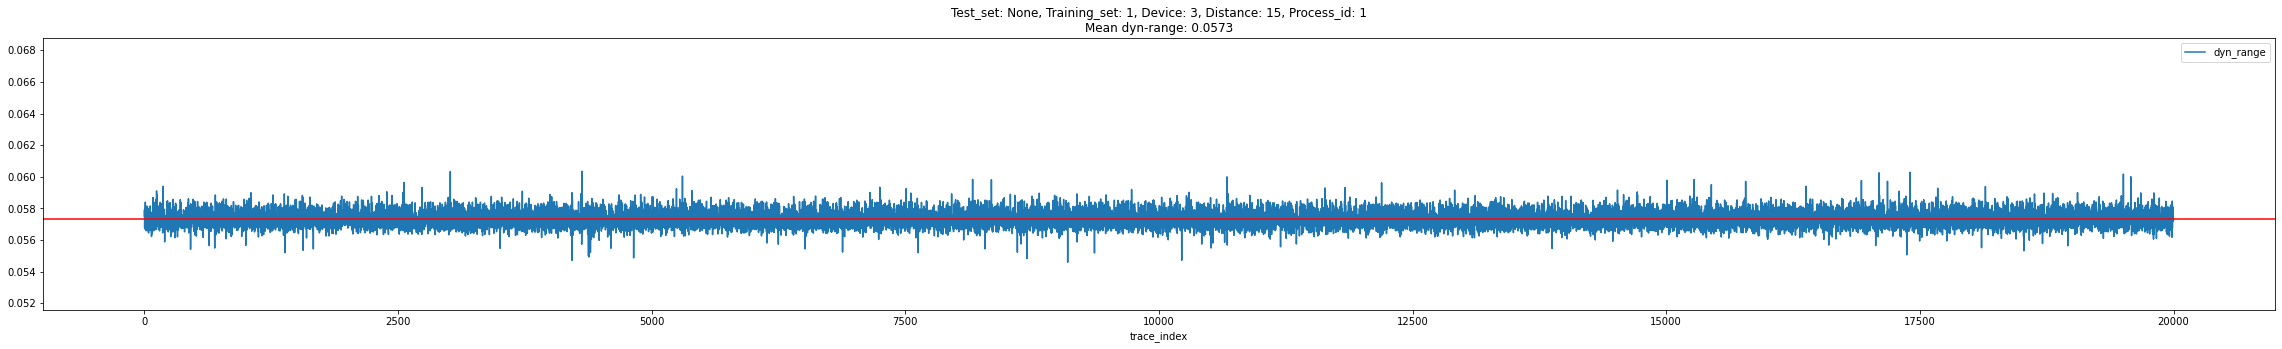

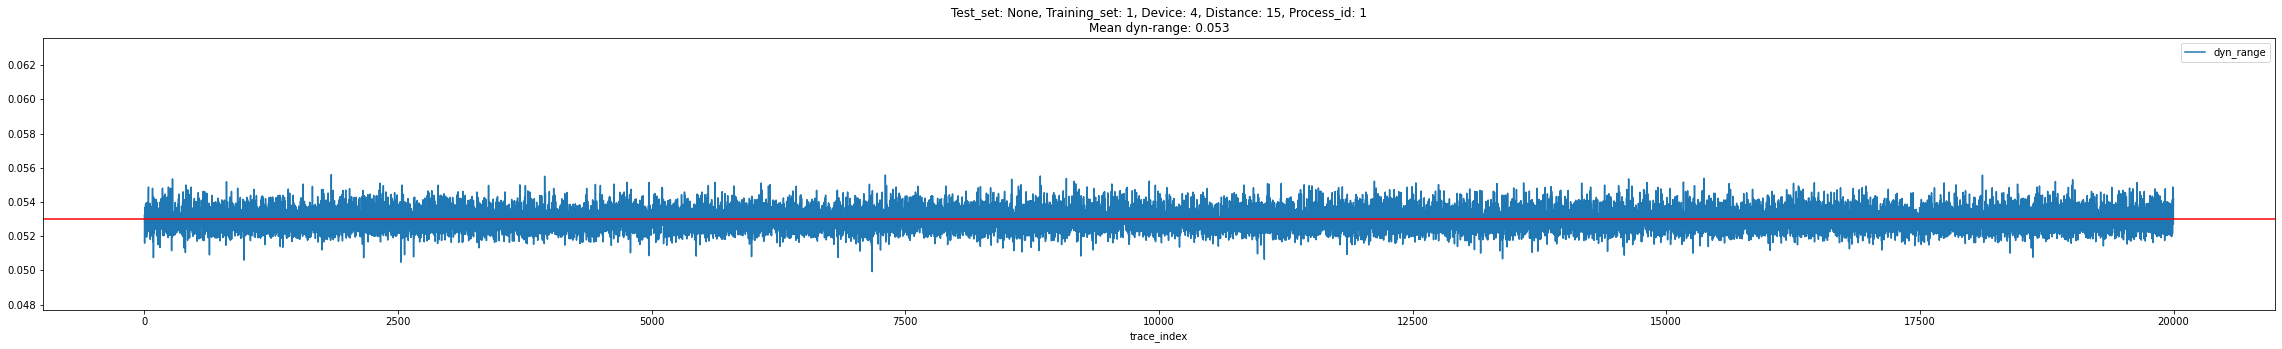

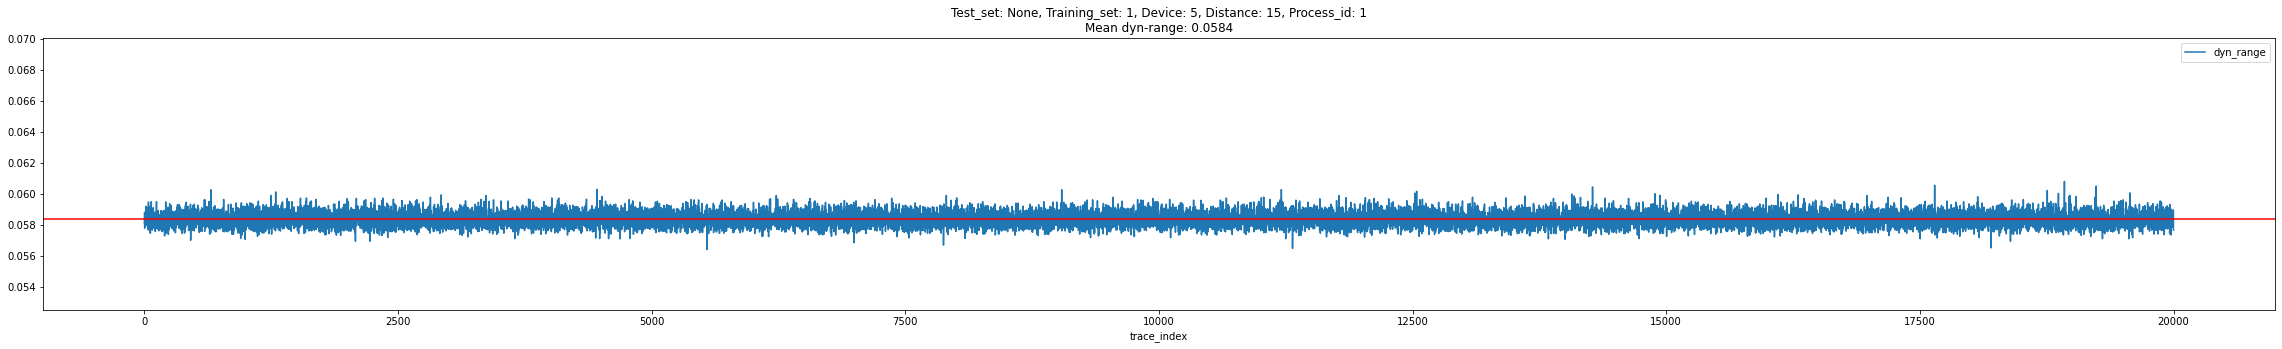

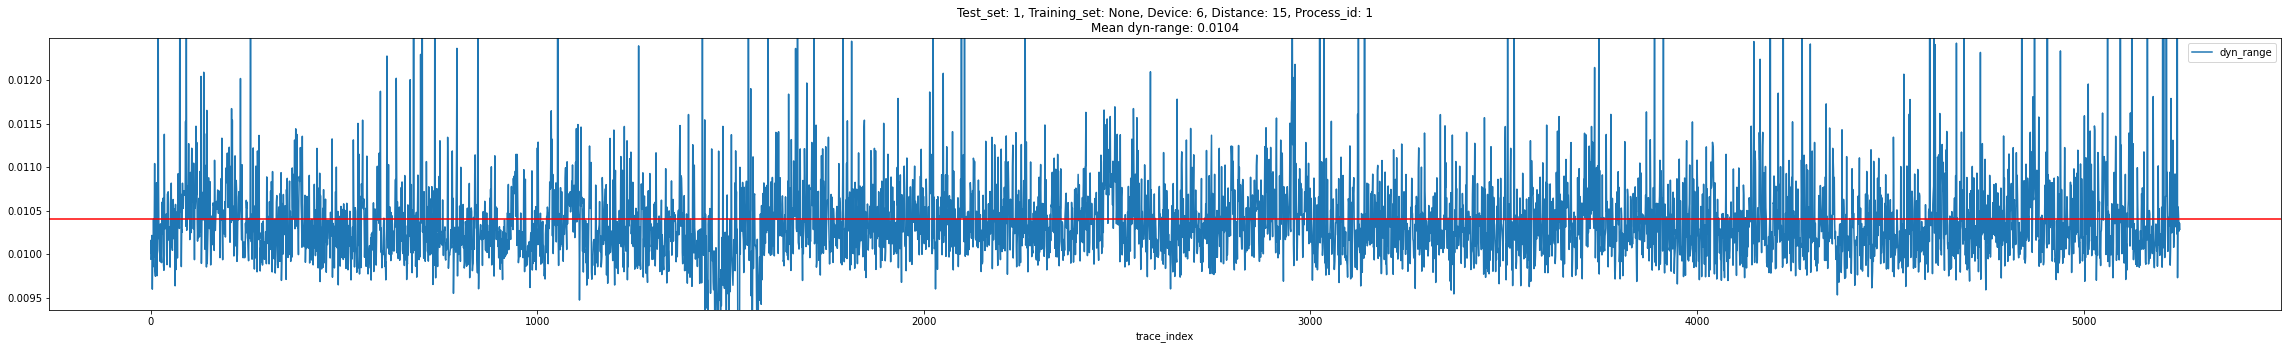

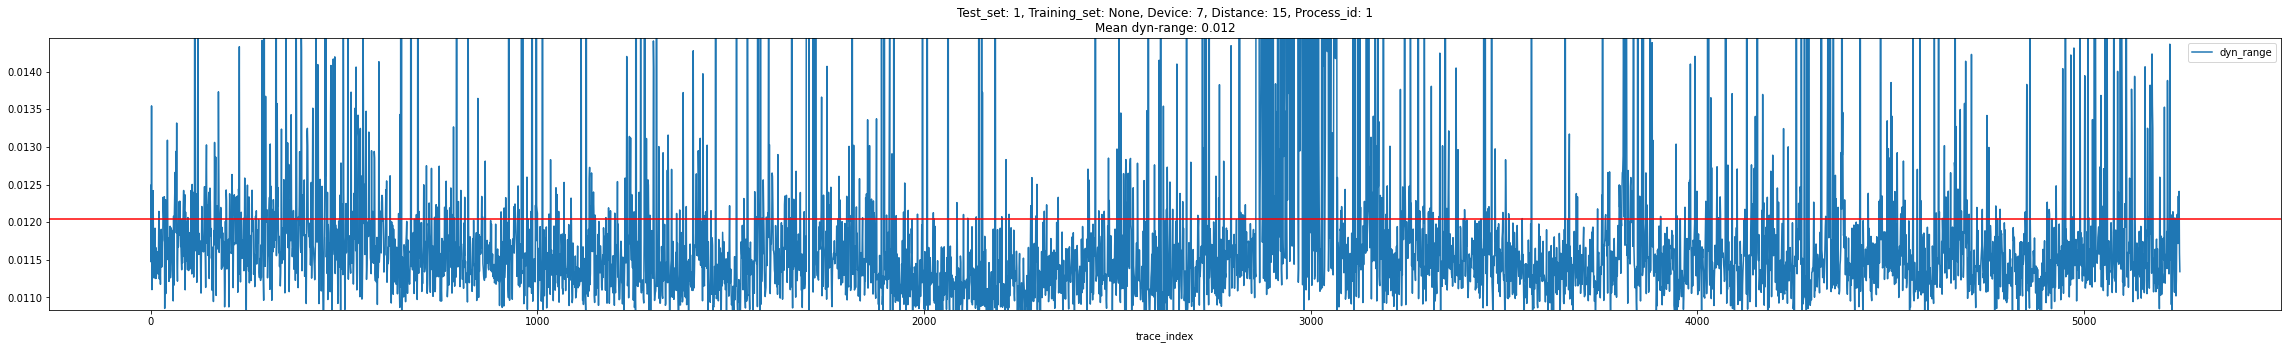

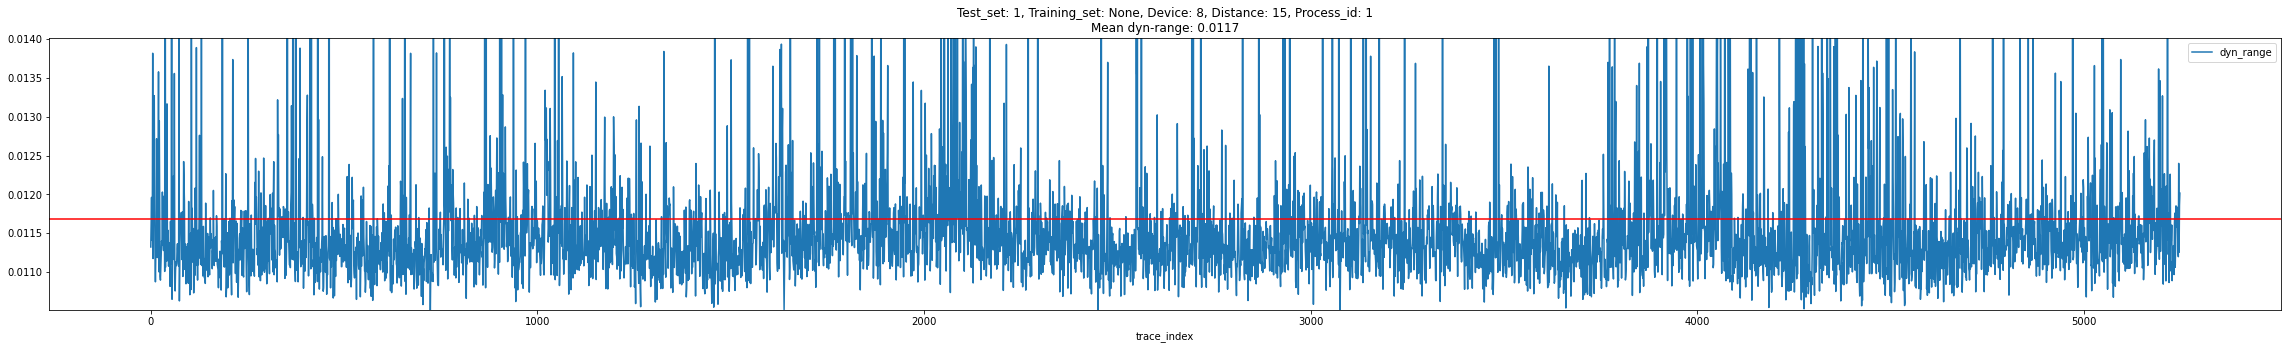

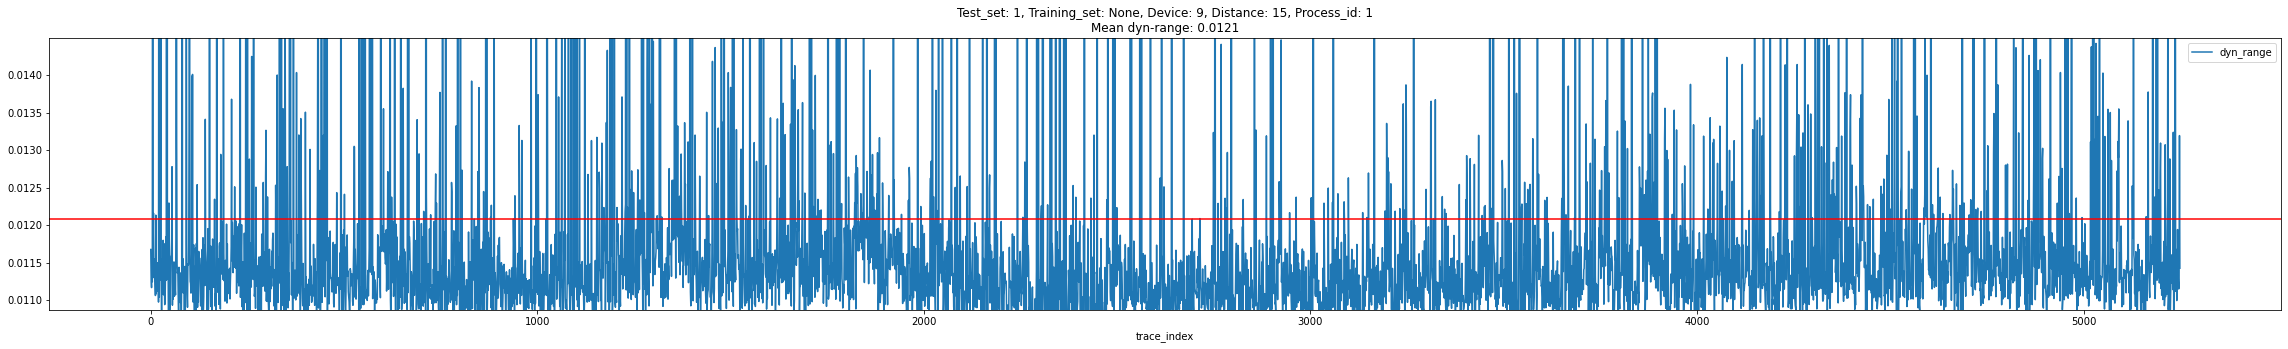

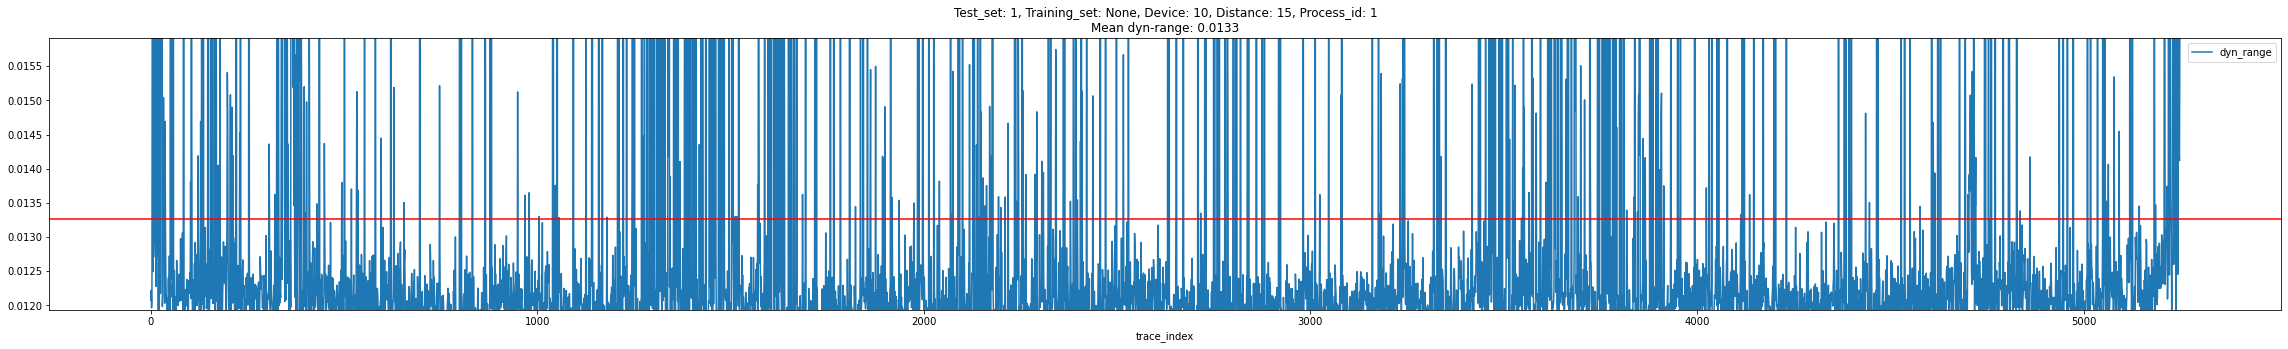

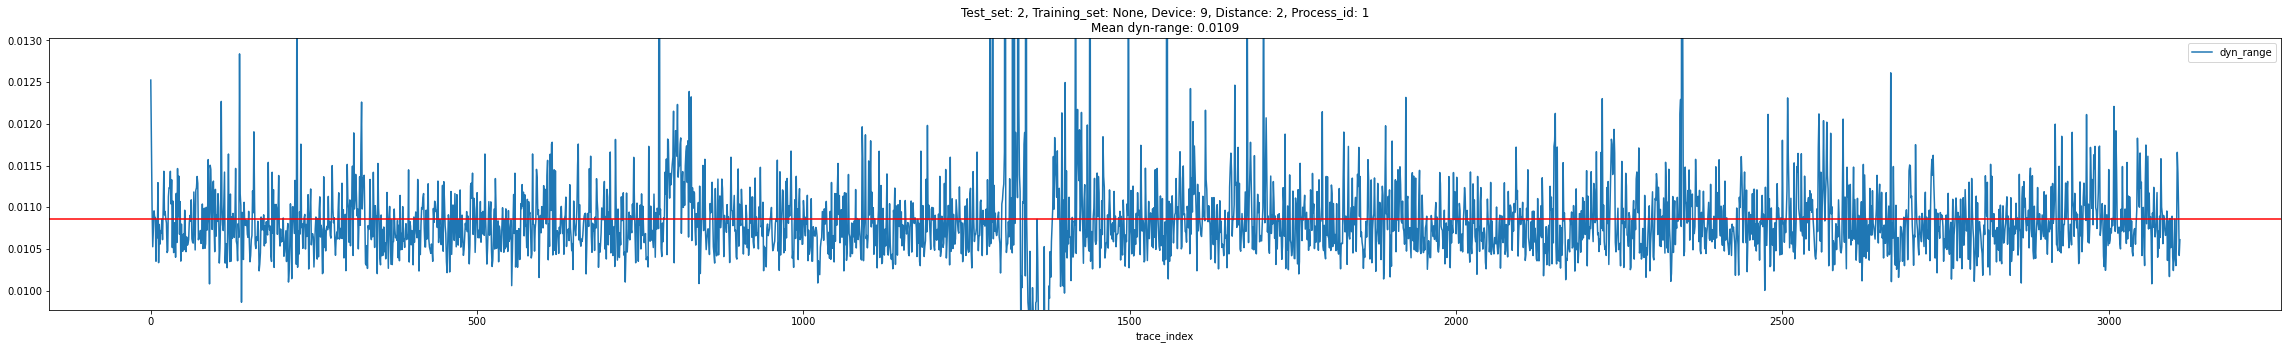

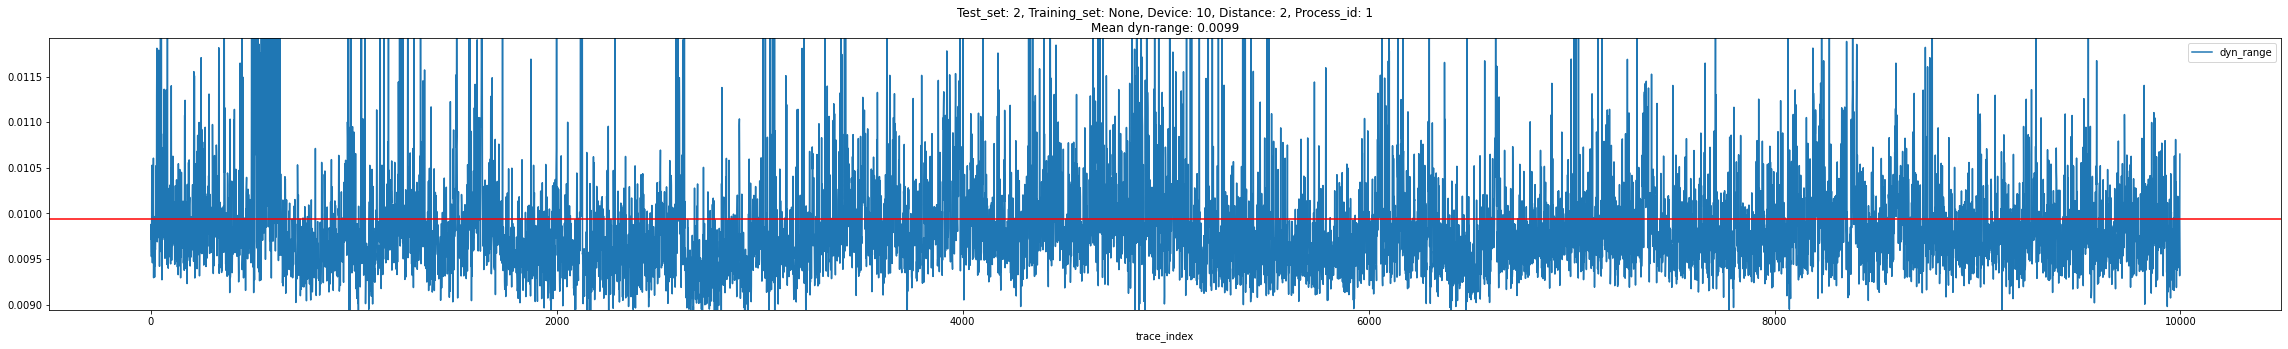

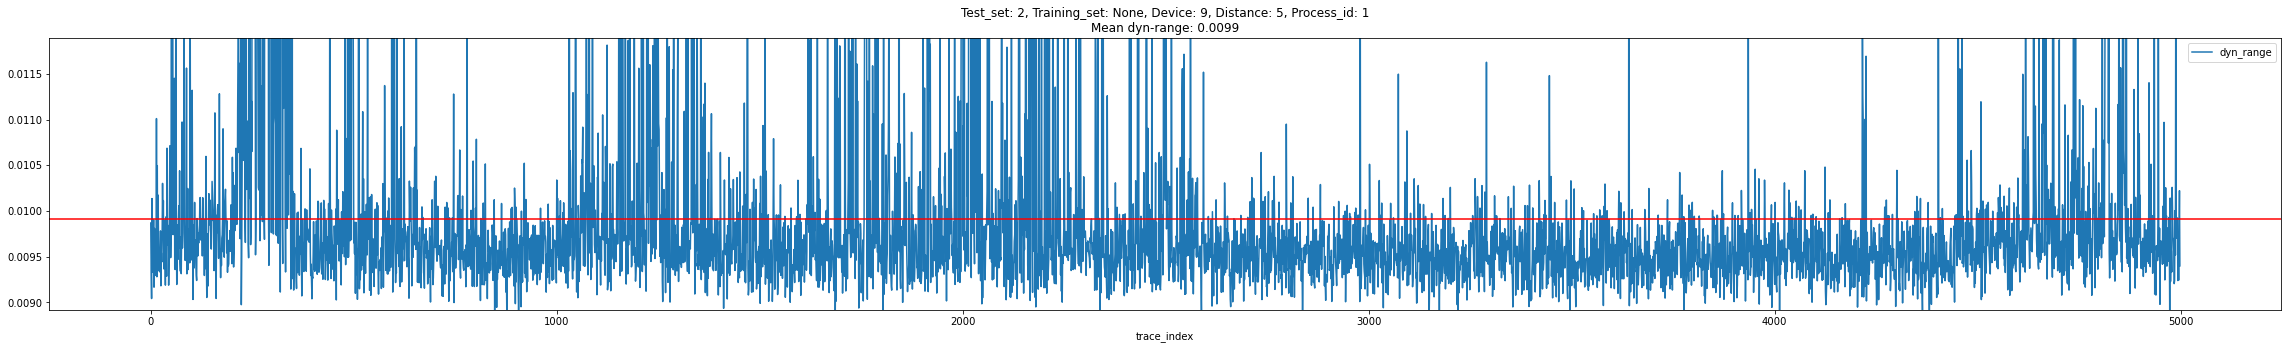

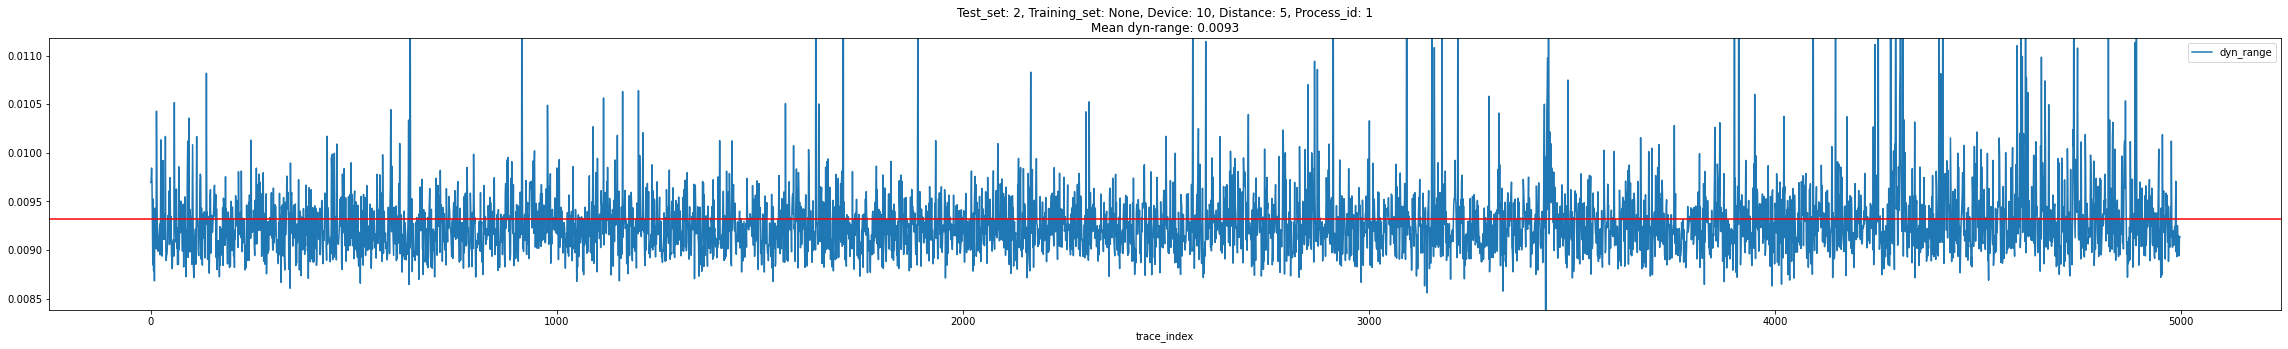

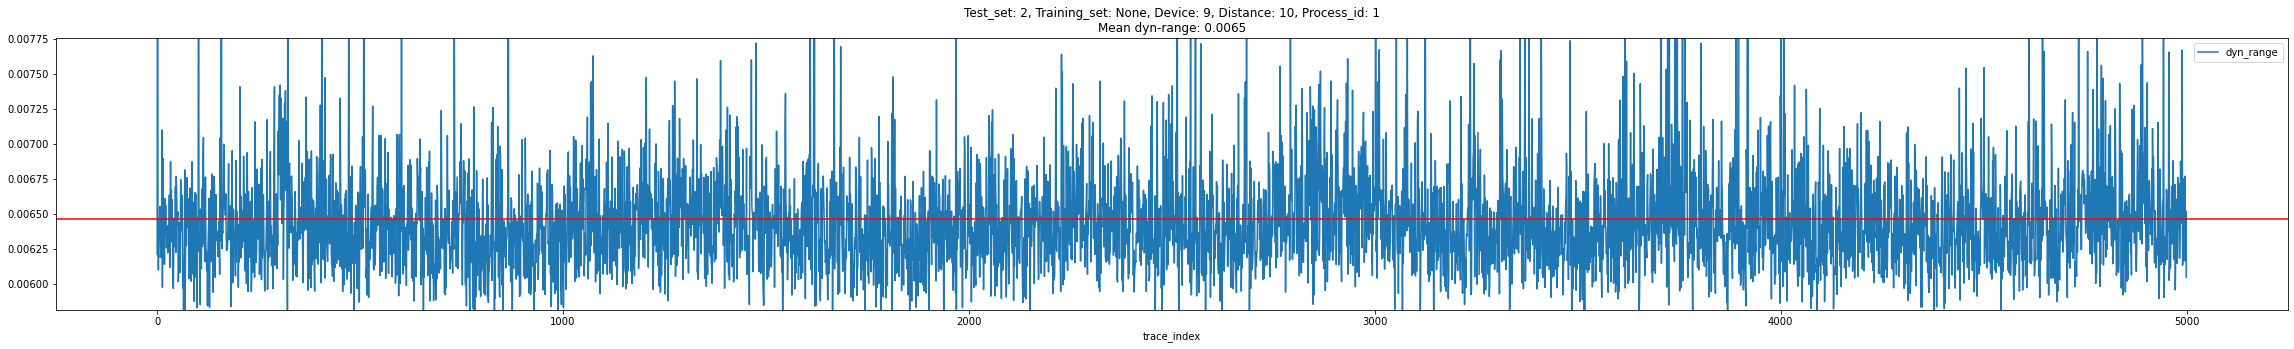

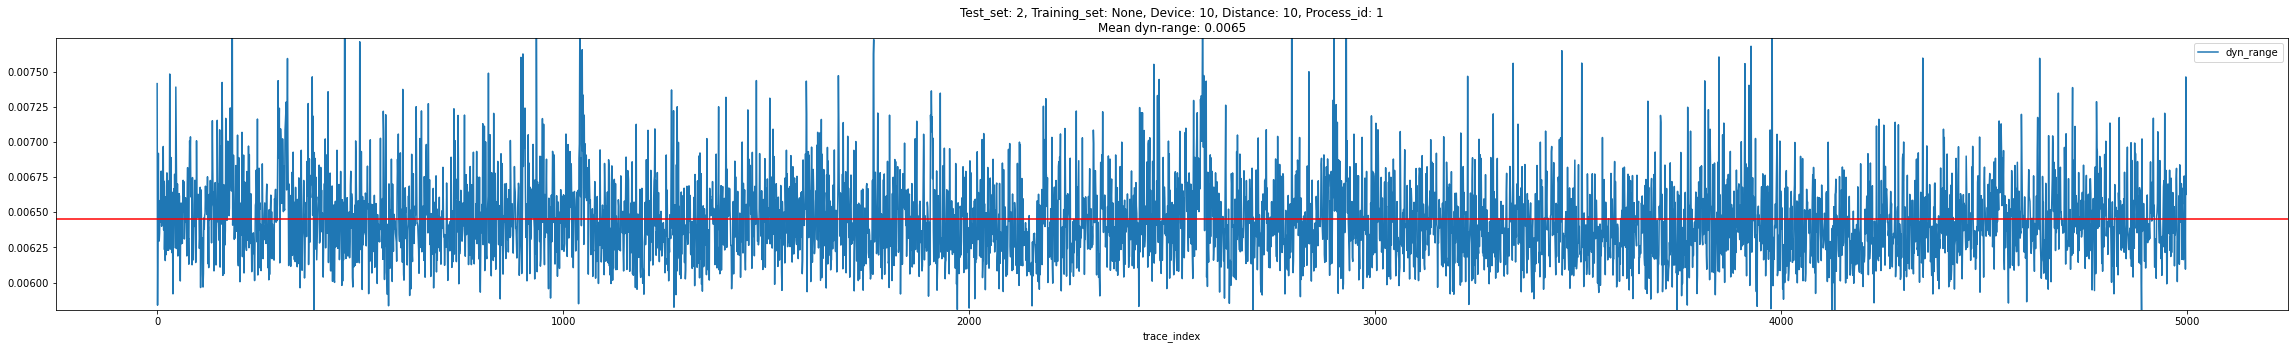

In [93]:
# Wang training set
test_set = "None"
training_set = 1
distances = [15]
devices = [1, 2, 3, 4, 5]
processes = [1] # [1, 3]
for distance in distances:
    for process in processes:
        for device in devices:
            plot_trace_width__test_traces_wang(test_set, training_set, distance, device, process)

# Wang test sets 15m, device 6-10
test_set = 1
training_set = "None"
distances = [15]
devices = [6, 7, 8, 9, 10]
processes = [1] # [1, 3]
for distance in distances:
    for process in processes:
        for device in devices:
            plot_trace_width__test_traces_wang(test_set, training_set, distance, device, process)

# Zedigh test_set, 2.5m, device 9-10
test_set = 2
training_set = "None"
distances = [2]
devices = [9, 10]
processes = [1] # [1, 3]
for distance in distances:
    for process in processes:
        for device in devices:
            plot_trace_width__test_traces_wang(test_set, training_set, distance, device, process)

# Zedigh test_set, 5-10m, device 9-10
test_set = 2
training_set = "None"
distances = [5, 10]
devices = [9, 10]
processes = [1] # [1, 3]
for distance in distances:
    for process in processes:
        for device in devices:
            plot_trace_width__test_traces_wang(test_set, training_set, distance, device, process)